In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 데이터 로드

In [2]:
housing = pd.read_csv('./housing.csv', encoding='cp949') # cp949 :   /utf8 : 한글 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe(include='all') # 전부다 보여준다 ( nan 값도 보여줌 )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### histogram

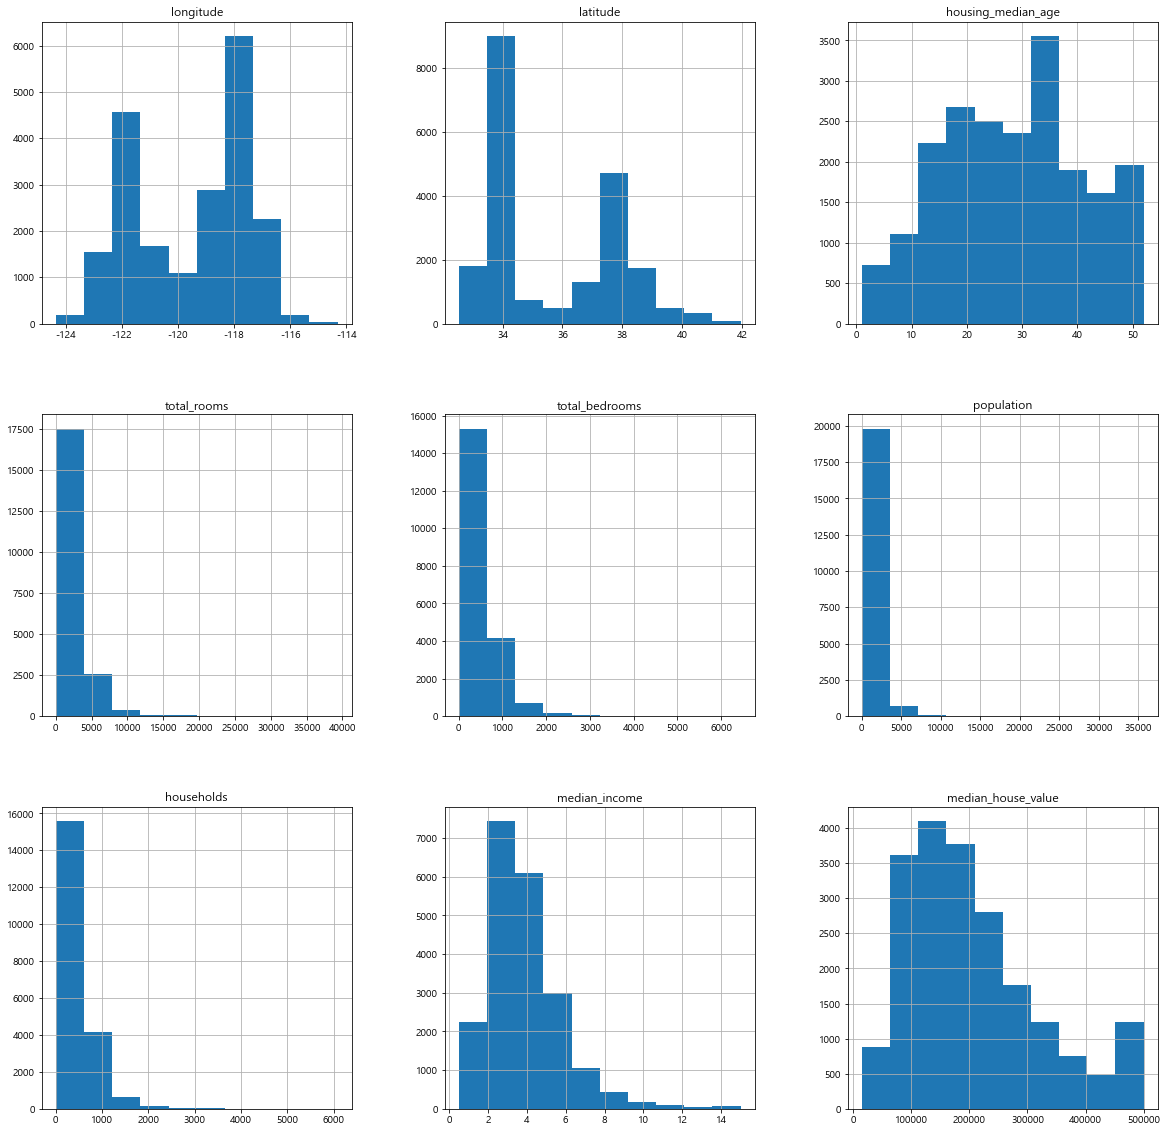

In [6]:
housing.hist(figsize=(20,20))
plt.show()

In [7]:
housing_origin = housing.copy() # 복사해서 하나 만들어 두기 
housing_origin.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


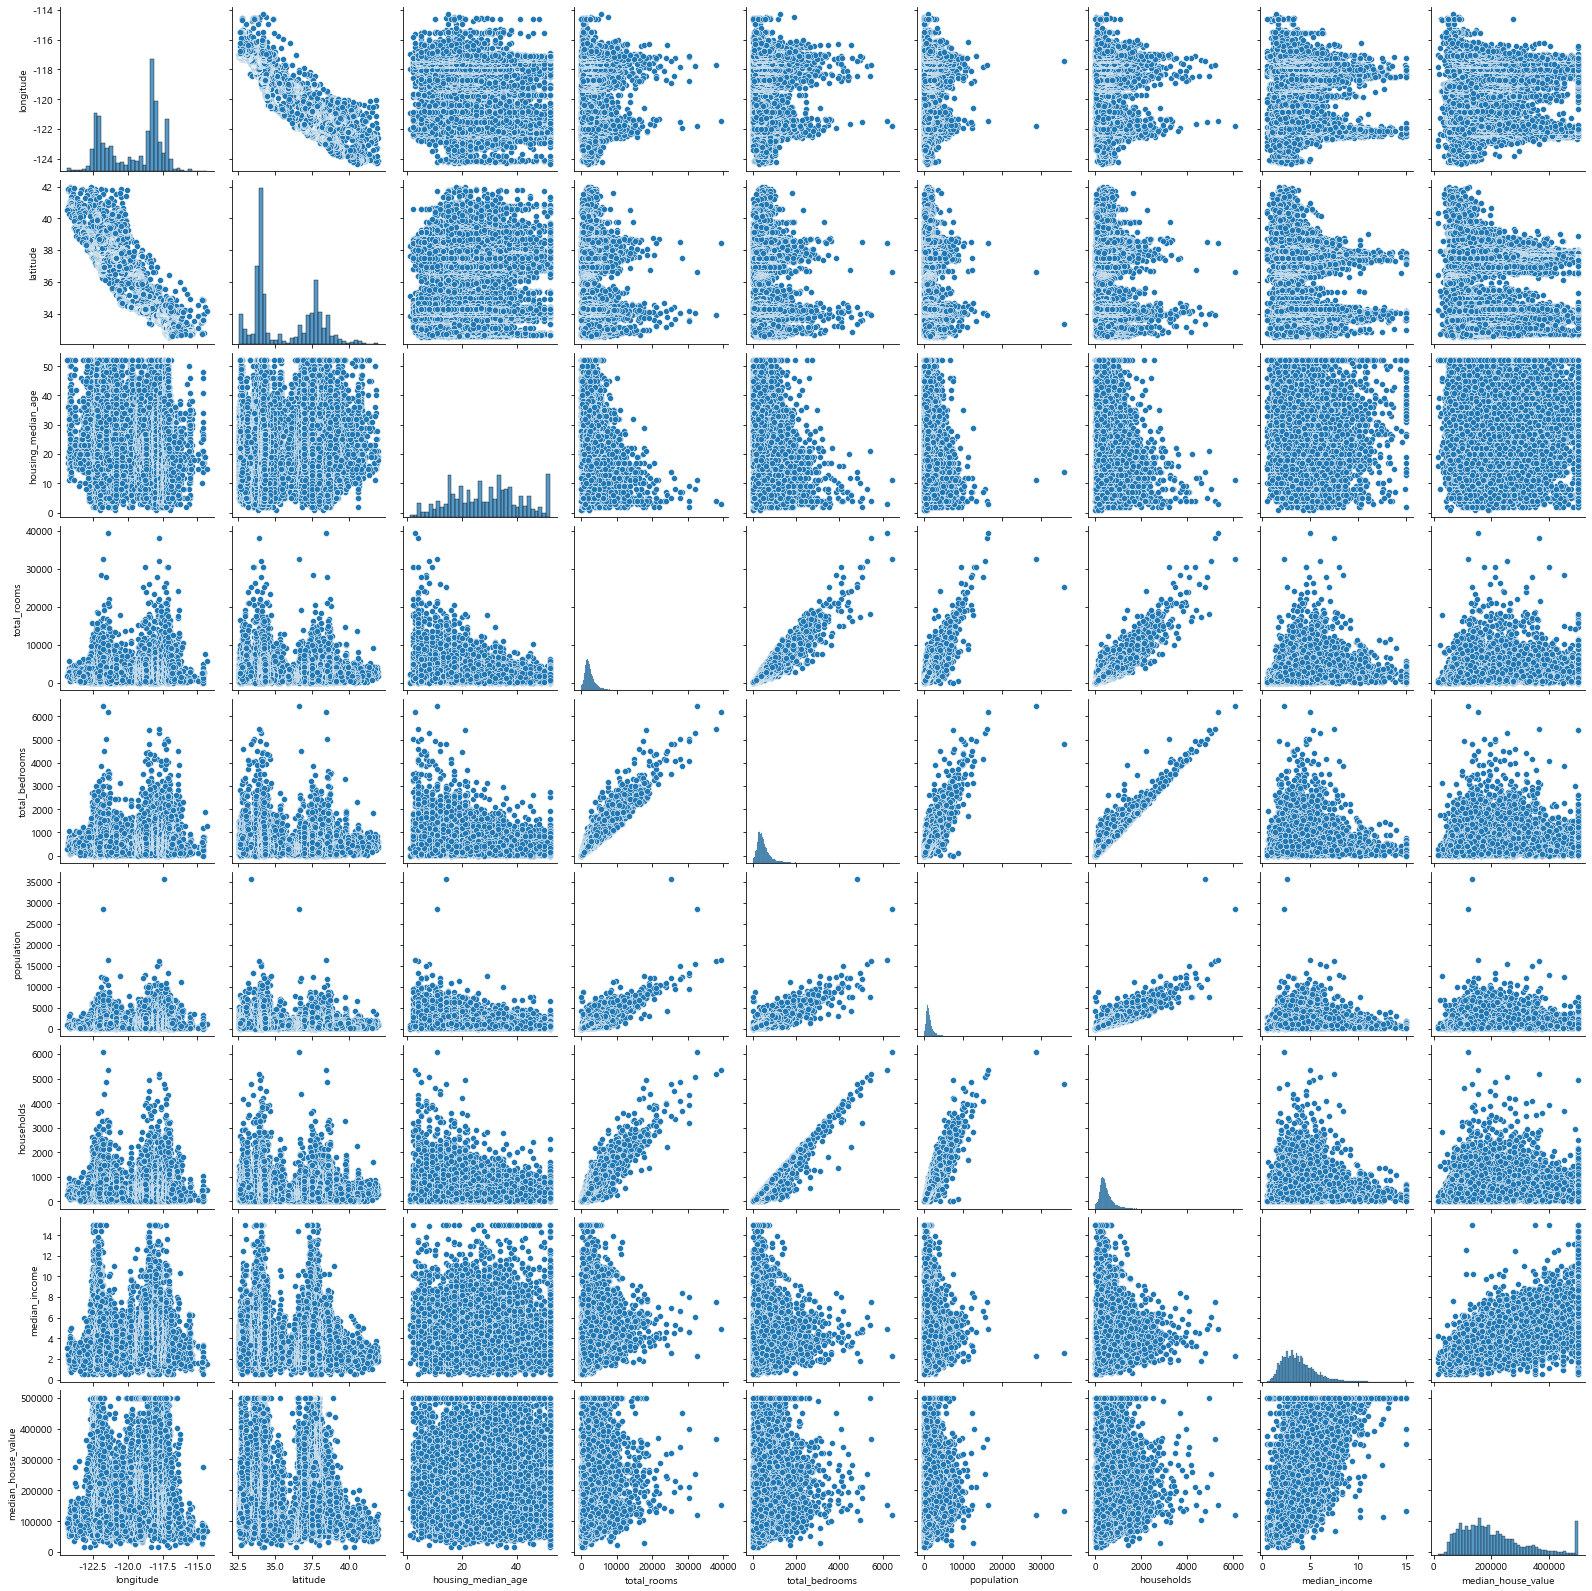

In [8]:
sns.pairplot(housing) # 두개의 상관관계를 보여준다. 

In [9]:
housing.corr() # 1일수록 정비례 그래프 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

<AxesSubplot:>

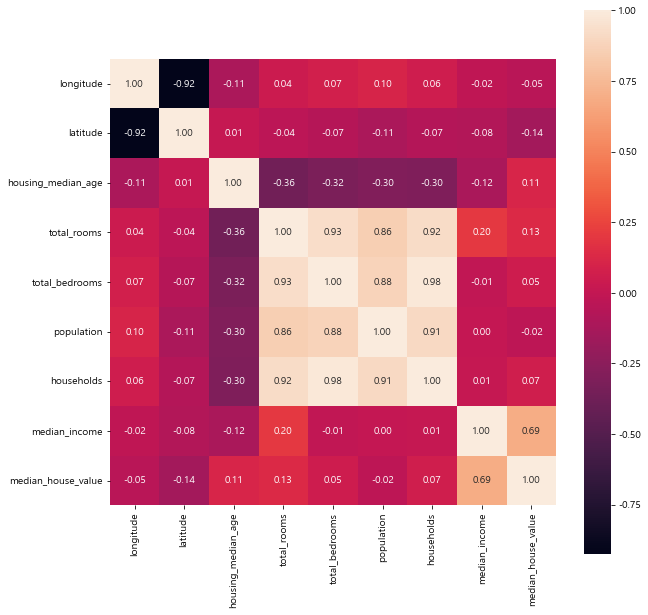

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(), annot=True, fmt=".2f", square=True)

In [12]:
housing.corr()['median_house_value'].abs().sort_values(ascending=False) # 내림 차순

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

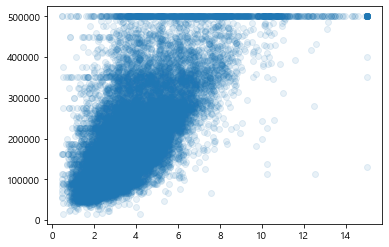

In [13]:
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.1)
# alpha : 투명도 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

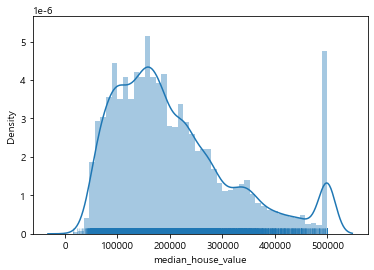

In [14]:
sns.distplot(housing['median_house_value'], rug=True, rug_kws={'alpha': 0.1})

## 지리데이터

In [15]:
housing.keys()


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

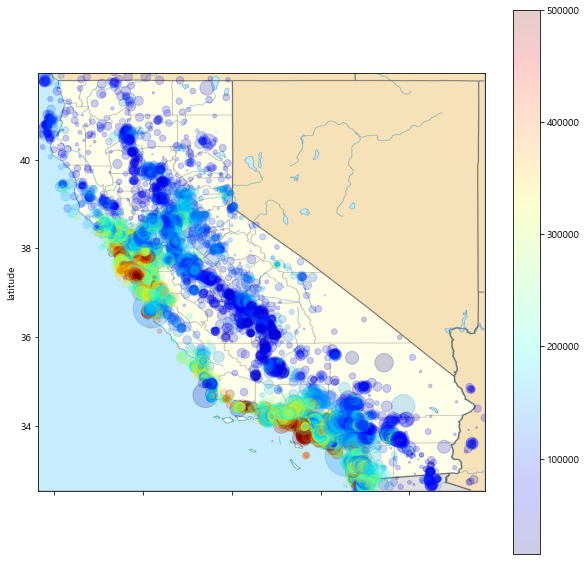

In [16]:
plt.figure()
housing.plot.scatter(x='longitude', 
                     y='latitude', 
                     s=housing['population']/20, # 마커 사이즈 
                     alpha=0.2, 
                     figsize=(10,10),
                     c=housing['median_house_value'], # 컬러 
                     cmap=plt.get_cmap('jet'))

img = plt.imread('./califonia.png') # 이미지를 불러옴 
plt.imshow(img, extent=[housing['longitude'].min(), housing['longitude'].max(), housing['latitude'].min(), housing['latitude'].max(),])
plt.show()

## 전처리

In [17]:
# 인덱스 순서로 나누기
test_ratio = 0.2 # 훈련세트 테스트 세트 비율 나누기 
train_data = housing.loc[:test_ratio*housing.shape[0], : ] # 학습하는 과정 거의 80프로
test_data = housing.loc[test_ratio*housing.shape[0]:, :] # 평가를 보여주는 과정 약 20프로 

In [18]:
np.random.seed(0)
idx_arr = np.random.permutation(housing.shape[0])
test_idx = idx_arr[:int(housing.shape[0]*test_ratio)]
train_idx = idx_arr[int(housing.shape[0]*test_ratio):]

train_data = housing.loc[train_idx, :]
test_data = housing.loc[test_idx, :]
train_data.shape, test_data.shape

((16512, 10), (4128, 10))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = housing.drop('median_house_value', axis=1) # 특정 열을 때는 것 
y = housing['median_house_value']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# random_state : 데이터를 쪼개는데 랜덤성을 정해준다. 쪼개는 경우의 수 , 0으로 지정하면 항상 같게 테스트와 결과를 쪼개줌 

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [23]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=X['ocean_proximity'])
# stratify : x 안에 넣은 값을 특히 조심해서 나눠라 

In [25]:
housing['ocean_proximity'].value_counts() / len(housing)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [26]:
X_train['ocean_proximity'].value_counts()/ len(X_train)

<1H OCEAN     0.442648
INLAND        0.317406
NEAR OCEAN    0.128755
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [27]:
X_test['ocean_proximity'].value_counts()/ len(X_test)

<1H OCEAN     0.442587
INLAND        0.317345
NEAR OCEAN    0.128876
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

## 결측치 처리

### 결측치 제거 ( 값이 안들어가 있는 것 nan값 ) 
#### 1. 행제거


In [28]:
X_train.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [29]:
np.sum(X_train[:].isnull().values[:,],axis=0) # null값이 얼마나 있는지 확인 


array([  0,   0,   0,   0, 159,   0,   0,   0,   0])

In [30]:
np.sum(X_test[:].isnull().values[:,],axis=0)

array([ 0,  0,  0,  0, 48,  0,  0,  0,  0])

In [31]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [32]:
X_train['total_bedrooms']

10261    681.0
17574    641.0
18304    617.0
8987     564.0
3596     316.0
         ...  
7411     483.0
12754    146.0
3405     573.0
14295    307.0
11359    491.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [33]:
X_train["longitude"]

10261   -117.85
17574   -121.92
18304   -122.12
8987    -118.37
3596    -118.49
          ...  
7411    -118.22
12754   -121.37
3405    -118.36
14295   -117.13
11359   -117.92
Name: longitude, Length: 16512, dtype: float64

In [34]:
X_train[X_train['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,NEAR BAY
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN
19559,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,INLAND
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY
...,...,...,...,...,...,...,...,...,...
2115,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,INLAND
5236,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,<1H OCEAN
7097,-117.98,33.92,27.0,3700.0,NaN,1793.0,552.0,5.3668,<1H OCEAN
7330,-118.17,33.98,41.0,756.0,NaN,873.0,212.0,2.7321,<1H OCEAN


In [35]:
X_train.shape

(16512, 9)

In [36]:
X_train.dropna().shape # nan 의 값을 삭제 

(16353, 9)

### 열제거 

In [37]:
X_train.dropna(axis=1).shape

(16512, 8)

### 대표값으로 대체

In [38]:
X_train.median()

C:\Users\User\AppData\Local\Temp/ipykernel_11168/3880955609.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.median()


longitude             -118.50500
latitude                34.26000
housing_median_age      29.00000
total_rooms           2126.00000
total_bedrooms         436.00000
population            1170.00000
households             410.00000
median_income            3.53075
dtype: float64

In [39]:
median_value = X_train.median()

X_train.fillna(median_value) # nan값에 중앙값을 채워주는 것 

C:\Users\User\AppData\Local\Temp/ipykernel_11168/755618418.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_value = X_train.median()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN


In [40]:
X_train.fillna(median_value).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576302,35.636741,28.698159,2638.437318,537.498970,1433.163578,501.021621,3.862962
std,1.999541,2.134570,12.583490,2206.989208,422.122989,1156.825167,385.699394,1.899589
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.940000,18.000000,1450.000000,298.000000,788.000000,280.000000,2.556800
50%,-118.505000,34.260000,29.000000,2126.000000,436.000000,1170.000000,410.000000,3.530750
75%,-118.010000,37.720000,37.000000,3148.000000,644.000000,1724.250000,606.000000,4.738700
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [41]:
X_train_origin = X_train.copy()

In [42]:
X_train = X_train.fillna(median_value)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN


## 특성 조합

In [43]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576302,35.636741,28.698159,2638.437318,537.498970,1433.163578,501.021621,3.862962
std,1.999541,2.134570,12.583490,2206.989208,422.122989,1156.825167,385.699394,1.899589
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.940000,18.000000,1450.000000,298.000000,788.000000,280.000000,2.556800
50%,-118.505000,34.260000,29.000000,2126.000000,436.000000,1170.000000,410.000000,3.530750
75%,-118.010000,37.720000,37.000000,3148.000000,644.000000,1724.250000,606.000000,4.738700
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [44]:
X_train['total_rooms'].mean()

2638.4373183139537

In [45]:
X_train['households'].mean()

501.0216206395349

In [46]:
X_train['rooms_per_households'] = X_train['total_rooms'] / X_train['households']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195
...,...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN,3.447639
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,5.715278
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN,6.473592
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN,4.952381


In [47]:
X_train['bedroom_ratio'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedroom_ratio
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325


In [48]:
X_train['pop_per_household'] =   X_train['population'] / X_train['households']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedroom_ratio,pop_per_household
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278,3.153392
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845,2.838160
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347,2.151463
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368,2.464789
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325,2.986971
...,...,...,...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN,3.447639,0.287671,4.618070
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,5.715278,0.177400,2.284722
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN,6.473592,0.155834,2.813380
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN,4.952381,0.196795,2.403175


In [49]:
# corr를 위해 target value 추가
X_train['median_house_value'] = y_train
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedroom_ratio,pop_per_household,median_house_value
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278,3.153392,288500.0
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845,2.838160,198400.0
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347,2.151463,360900.0
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368,2.464789,439100.0
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325,2.986971,262300.0


In [50]:
X_train.corr()['median_house_value'].abs().sort_values(ascending=False)

median_house_value      1.000000
median_income           0.685890
bedroom_ratio           0.232459
rooms_per_households    0.155358
latitude                0.146327
total_rooms             0.131691
housing_median_age      0.107947
households              0.064741
total_bedrooms          0.049800
longitude               0.043821
pop_per_household       0.033141
population              0.026682
Name: median_house_value, dtype: float64

## 스케일링 

In [51]:
X_train = X_train.drop('median_house_value', axis=1)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedroom_ratio,pop_per_household
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278,3.153392
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845,2.838160
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347,2.151463
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368,2.464789
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325,2.986971
...,...,...,...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN,3.447639,0.287671,4.618070
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,5.715278,0.177400,2.284722
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN,6.473592,0.155834,2.813380
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN,4.952381,0.196795,2.403175


In [52]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576302,35.636741,28.698159,2638.437318,537.498970,1433.163578,501.021621,3.862962,5.412122,0.213793,3.033435
std,1.999541,2.134570,12.583490,2206.989208,422.122989,1156.825167,385.699394,1.899589,2.502930,0.064499,6.439446
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.037236,0.750000
25%,-121.790000,33.940000,18.000000,1450.000000,298.000000,788.000000,280.000000,2.556800,4.434855,0.175245,2.431483
50%,-118.505000,34.260000,29.000000,2126.000000,436.000000,1170.000000,410.000000,3.530750,5.222540,0.203205,2.824892
75%,-118.010000,37.720000,37.000000,3148.000000,644.000000,1724.250000,606.000000,4.738700,6.043876,0.240594,3.286448
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,2.831169,599.714286



### Min-Max Scaling (정규화) 

=> (x - min(x)) / (max(x) - min(x))

In [53]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_households', 'bedroom_ratio',
       'pop_per_household'],
      dtype='object')

In [54]:
num_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_households', 'bedroom_ratio',
       'pop_per_household']

In [55]:
min_x = X_train[num_columns].min()
max_x = X_train[num_columns].max()

In [56]:
X_train_scaled = (X_train[num_columns] - min_x) / (max_x - min_x)
X_train_scaled.describe()
X_train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household
10261,0.647410,0.142402,0.254902,0.120835,0.105525,0.059839,0.111330,0.473504,0.043698,0.037954,0.004013
17574,0.242032,0.507970,0.529412,0.053080,0.099317,0.046610,0.096366,0.128509,0.019230,0.096498,0.003486
18304,0.222112,0.517535,0.627451,0.073503,0.095593,0.034951,0.095379,0.336051,0.029288,0.063033,0.002340
8987,0.595618,0.154091,0.607843,0.102142,0.087368,0.039155,0.093241,0.563572,0.044149,0.036913,0.002863
3596,0.583665,0.180659,0.647059,0.050079,0.048883,0.025617,0.050321,0.385967,0.039515,0.044056,0.003735
...,...,...,...,...,...,...,...,...,...,...,...
7411,0.610558,0.149841,0.686275,0.042652,0.074798,0.062950,0.079921,0.159777,0.018442,0.089635,0.006458
12754,0.296813,0.645058,0.745098,0.020881,0.022502,0.009137,0.023516,0.178163,0.034517,0.050167,0.002562
3405,0.596614,0.182784,0.647059,0.093469,0.088765,0.044704,0.093241,0.437104,0.039893,0.042448,0.003445
14295,0.719124,0.019129,1.000000,0.039626,0.047486,0.021133,0.051636,0.152301,0.029109,0.057109,0.002760


### Standard Scaling

=> (x - mean(x)) / std(x)

In [57]:
mean_x = X_train[num_columns].mean()
std_x = X_train[num_columns].std()

X_train_scaled = (X_train[num_columns] - mean_x) / std_x
X_train_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-3.633880e-13,-6.202779e-15,-1.821460e-17,-1.167106e-16,5.892681e-17,2.442733e-17,-1.670932e-17,-7.540150e-15,7.257182e-15,1.379467e-14,-2.971006e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.387397e+00,-1.450756e+00,-2.201151e+00,-1.194586e+00,-1.270954e+00,-1.236283e+00,-1.296402e+00,-1.770415e+00,-1.824249e+00,-2.737341e+00,-3.546011e-01
25%,-1.107103e+00,-7.948865e-01,-8.501742e-01,-5.384881e-01,-5.673678e-01,-5.577019e-01,-5.730411e-01,-6.876024e-01,-3.904491e-01,-5.976497e-01,-9.347879e-02
50%,5.357741e-01,-6.449734e-01,2.398707e-02,-2.321884e-01,-2.404488e-01,-2.274878e-01,-2.359911e-01,-1.748863e-01,-7.574389e-02,-1.641640e-01,-3.238513e-02
75%,7.833309e-01,9.759616e-01,6.597407e-01,2.308859e-01,2.522986e-01,2.516253e-01,2.721767e-01,4.610143e-01,2.524060e-01,4.155132e-01,3.929121e-02
max,2.633756e+00,2.957625e+00,1.851779e+00,1.662064e+01,1.399474e+01,2.960589e+01,1.446976e+01,5.862919e+00,5.453487e+01,4.057985e+01,9.266027e+01


In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [59]:
scaler = StandardScaler()
scaler.fit(X_train[num_columns])

StandardScaler()

In [60]:
scaler.transform(X_train[num_columns])

array([[ 0.86337546, -0.82302007, -1.16808639, ...,  0.63855206,
        -1.09330278,  0.01862915],
       [-1.17215364,  0.78859416, -0.05548381, ..., -0.74049376,
         1.44272736, -0.03032564],
       [-1.27217964,  0.83075848,  0.34187425, ..., -0.1736005 ,
        -0.00691493, -0.13696803],
       ...,
       [ 0.60830916, -0.64499292,  0.42134586, ...,  0.42410374,
        -0.89863412, -0.03417389],
       [ 1.22346906, -1.36647138,  1.85183489, ..., -0.18368652,
        -0.26354981, -0.09787783],
       [ 0.82836636, -0.88860902, -0.85019994, ..., -0.73257113,
         1.3299714 ,  0.38101712]])

In [61]:
scaler.fit_transform(X_train[num_columns])

array([[ 0.86337546, -0.82302007, -1.16808639, ...,  0.63855206,
        -1.09330278,  0.01862915],
       [-1.17215364,  0.78859416, -0.05548381, ..., -0.74049376,
         1.44272736, -0.03032564],
       [-1.27217964,  0.83075848,  0.34187425, ..., -0.1736005 ,
        -0.00691493, -0.13696803],
       ...,
       [ 0.60830916, -0.64499292,  0.42134586, ...,  0.42410374,
        -0.89863412, -0.03417389],
       [ 1.22346906, -1.36647138,  1.85183489, ..., -0.18368652,
        -0.26354981, -0.09787783],
       [ 0.82836636, -0.88860902, -0.85019994, ..., -0.73257113,
         1.3299714 ,  0.38101712]])

In [62]:
pd.DataFrame(scaler.transform(X_train[num_columns]), columns=num_columns).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.015795e-15,5.319953e-16,-2.489799e-17,-9.291865e-17,8.946685e-17,1.217668e-17,8.570240e-18,-8.291037e-17,-2.247946e-16,-4.464829e-16,6.529755e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387470e+00,-1.450800e+00,-2.201217e+00,-1.194622e+00,-1.270993e+00,-1.236321e+00,-1.296442e+00,-1.770469e+00,-1.824304e+00,-2.737424e+00,-3.546118e-01
25%,-1.107137e+00,-7.949105e-01,-8.501999e-01,-5.385044e-01,-5.673849e-01,-5.577188e-01,-5.730585e-01,-6.876232e-01,-3.904610e-01,-5.976678e-01,-9.348162e-02
50%,5.357903e-01,-6.449929e-01,2.398780e-02,-2.321954e-01,-2.404561e-01,-2.274947e-01,-2.359982e-01,-1.748916e-01,-7.574618e-02,-1.641689e-01,-3.238611e-02
75%,7.833547e-01,9.759912e-01,6.597607e-01,2.308929e-01,2.523062e-01,2.516329e-01,2.721849e-01,4.610282e-01,2.524137e-01,4.155257e-01,3.929240e-02
max,2.633836e+00,2.957714e+00,1.851835e+00,1.662114e+01,1.399516e+01,2.960678e+01,1.447020e+01,5.863096e+00,5.453652e+01,4.058108e+01,9.266308e+01


In [63]:
X_test['rooms_per_households'] = X_test['total_rooms'] / X_test['households']
X_test['bedroom_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['pop_per_household'] = X_test['population'] / X_test['households']
X_test.head(2)

C:\Users\User\AppData\Local\Temp/ipykernel_11168/4272597046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['rooms_per_households'] = X_test['total_rooms'] / X_test['households']
C:\Users\User\AppData\Local\Temp/ipykernel_11168/4272597046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['bedroom_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
C:\Users\User\AppData\Local\Temp/ipykernel_11168/4272597046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedroom_ratio,pop_per_household
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,6.497018,0.150245,2.84493
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,<1H OCEAN,4.515254,0.276276,5.20000


In [64]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[num_columns]),
    columns=num_columns
)
X_test_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4080.000000,4128.000000,4128.000000,4128.000000,4128.000000,4080.000000,4128.000000
mean,0.016498,-0.011431,-0.023314,-0.006059,-0.004962,-0.033225,-0.019212,0.020291,0.033718,-0.027060,0.028901
std,1.009985,1.003332,1.000755,0.941241,0.972655,0.889371,0.955512,1.000598,0.940814,0.907184,3.001428
min,-2.317451,-1.446115,-2.201217,-1.192809,-1.268624,-1.231998,-1.293849,-1.770469,-1.710721,-1.764305,-0.363571
25%,-1.113388,-0.804280,-0.850200,-0.542696,-0.574492,-0.562906,-0.575651,-0.669737,-0.375612,-0.597984,-0.094449
50%,0.553295,-0.659048,-0.055484,-0.230610,-0.252301,-0.243055,-0.246369,-0.162573,-0.058517,-0.169337,-0.036653
75%,0.794608,0.971306,0.659761,0.229194,0.259413,0.253146,0.256628,0.479072,0.273487,0.367684,0.035932
max,2.543812,2.957714,1.851835,10.217198,9.368409,9.266881,10.036561,5.863096,22.778032,12.189737,192.615543


### Encoding

In [65]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: ocean_proximity, dtype: int64

In [66]:
pd.get_dummies(X_train['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10261,1,0,0,0,0
17574,1,0,0,0,0
18304,0,0,0,1,0
8987,1,0,0,0,0
3596,1,0,0,0,0
...,...,...,...,...,...
7411,1,0,0,0,0
12754,0,1,0,0,0
3405,1,0,0,0,0
14295,0,0,0,0,1


In [67]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot.fit(X_train[['ocean_proximity']])

OneHotEncoder()

In [68]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
onehot.transform(X_train[['ocean_proximity']]).toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [70]:
pd.DataFrame(
    onehot.transform(X_train[['ocean_proximity']]).toarray(),
    columns=onehot.categories_[0]
)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,0.0,0.0,0.0,0.0,1.0


In [71]:
cgr_columns = ['ocean_proximity']

X_train_ready = X_train_scaled.join(
    pd.get_dummies(X_train[cgr_columns])
)

In [72]:
X_test_ready = X_test_scaled.join(
    pd.get_dummies(X_train[cgr_columns])
)
X_test_ready.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.353503,-1.366471,-1.247558,0.285267,-0.110158,-0.001870,0.005129,1.001425,0.433464,-0.985285,-0.029274,0.0,0.0,0.0,1.0,0.0
1,0.853373,-0.827705,-1.009143,-0.591972,-0.401551,0.087169,-0.534167,-0.442352,-0.358338,0.968769,0.336462,0.0,0.0,0.0,1.0,0.0
2,-1.542250,1.313306,-0.929672,1.439363,0.854045,1.020787,1.000754,0.264664,0.456952,-0.920423,-0.013421,NaN,NaN,NaN,NaN,NaN
3,-1.207163,0.755800,-0.293899,-0.405740,-0.771123,-0.716780,-0.780480,3.629967,1.319645,-1.428953,-0.002086,0.0,0.0,0.0,1.0,0.0
4,-0.456968,-0.134336,-0.929672,0.183315,0.167020,0.020606,0.114026,-0.367913,0.068468,-0.216913,-0.055913,0.0,0.0,0.0,1.0,0.0
5,-1.227168,0.929142,0.500817,-0.607379,-0.714266,-0.692575,-0.770109,0.015761,0.379816,-0.495756,0.010033,0.0,0.0,0.0,1.0,0.0
6,-0.091873,-0.560664,-0.055484,-0.296085,0.105425,-0.294923,0.121804,-0.733266,-0.715127,1.231147,-0.161623,NaN,NaN,NaN,NaN,NaN
7,0.738343,-0.823020,-0.850200,2.450273,1.619248,2.457521,1.884889,1.415369,0.455478,-0.961910,0.069674,NaN,NaN,NaN,NaN,NaN
8,0.883381,-0.893294,-0.452842,0.189206,0.043830,0.064693,0.139954,0.455027,0.037631,-0.493911,-0.049123,0.0,0.0,0.0,1.0,0.0
9,-1.422219,0.999416,1.851835,-0.703440,-0.446563,-0.729747,-0.363044,-0.707733,-0.960428,1.667813,-0.217705,0.0,0.0,0.0,1.0,0.0


In [73]:
X_train_ready.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10261,0.863349,-0.822995,-1.168051,0.958121,0.339951,0.609285,0.458851,1.843997,0.638533,-1.093270,0.018629,1,0,0,0,0
17574,-1.172118,0.788570,-0.055482,-0.248953,0.245192,0.201272,0.222916,-0.789467,-0.740471,1.442684,-0.030325,1,0,0,0,0


# 모델 적용 

In [87]:
import numpy as np
a = np.zeros((6,3))
print(a)
b = a[0,:]
b

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([0., 0., 0.])

In [80]:
from sklearn.linear_model import LinearRegression
# x와 y사이의 관계를 찾아내는 방법입니다
from sklearn.ensemble  import RandomForestRegressor 
# dt를 여러개 사용해서 분류해서 예측하는 방식 

In [90]:
lin_reg = LinearRegression()
A = lin_reg.fit(X_train_ready, y_train)
A

LinearRegression()

In [92]:
X_train_predict = lin_reg.predict(X_train_ready) # 16512, 16 
X_train_predict.shape
print(X_train_ready.iloc[0:1,:].shape)
X_train_predict = lin_reg_predict(X_train_ready.iloc[0:1,:])
print(X_train_predict)

(1, 16)


NameError: name 'lin_reg_predict' is not defined

In [95]:
forest = RandomForestRegressor()
forest.fit(X_train_ready, y_train)

RandomForestRegressor()

In [98]:
X_train_predict_for = forest.predict(X_train_ready)
X_train_predict_for

array([308978.  , 201205.  , 378339.06, ..., 378909.04, 195215.  ,
       160596.  ])

특정 시간을 계산하는 함수

In [97]:
import time
start = time.time()
forest.fit(X_train_ready, y_train)
end = time.time()
print(end-start)

9.086906909942627


## scoring by performance measure

In [99]:
from sklearn.metrics import mean_squared_error # 오차제곱평균 

In [100]:
# Linear Regression MSE
np.sqrt(mean_squared_error(X_train_predict, y_train))

68624.11055496849

In [101]:
# RandomForest MSE
np.sqrt(
    mean_squared_error(X_train_predict_for, y_train)
) # 에러가 더 낮음 -> 랜덤포레스트로 한것의 오차 

18594.035738031307

In [ ]:
# test


### test 데이터 준비

In [102]:
X_test_origin = X_test.copy()
X_test = X_test.fillna(median_value)

X_test.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
ocean_proximity          0
rooms_per_households     0
bedroom_ratio           48
pop_per_household        0
dtype: int64

In [103]:
X_test['bedroom_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedroom_ratio,pop_per_household
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,6.497018,0.150245,2.84493
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,<1H OCEAN,4.515254,0.276276,5.20000


In [104]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[num_columns]),
    columns=num_columns
)
X_test_scaled.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household
0,1.353503,-1.366471,-1.247558,0.285267,-0.110158,-0.00187,0.005129,1.001425,0.433464,-0.985285,-0.029274


In [105]:
X_test_ready = X_test_scaled.join(
    pd.get_dummies(
        X_test[cgr_columns]
    ).reset_index() # reset_index: index초기화
)
X_test_ready.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedroom_ratio,pop_per_household,index,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.353503,-1.366471,-1.247558,0.285267,-0.110158,-0.001870,0.005129,1.001425,0.433464,-0.985285,-0.029274,15610,1,0,0,0,0
1,0.853373,-0.827705,-1.009143,-0.591972,-0.401551,0.087169,-0.534167,-0.442352,-0.358338,0.968769,0.336462,10272,1,0,0,0,0
2,-1.542250,1.313306,-0.929672,1.439363,0.854045,1.020787,1.000754,0.264664,0.456952,-0.920423,-0.013421,19171,1,0,0,0,0
3,-1.207163,0.755800,-0.293899,-0.405740,-0.771123,-0.716780,-0.780480,3.629967,1.319645,-1.428953,-0.002086,18053,1,0,0,0,0
4,-0.456968,-0.134336,-0.929672,0.183315,0.167020,0.020606,0.114026,-0.367913,0.068468,-0.216913,-0.055913,16731,1,0,0,0,0
5,-1.227168,0.929142,0.500817,-0.607379,-0.714266,-0.692575,-0.770109,0.015761,0.379816,-0.495756,0.010033,812,0,0,0,1,0
6,-0.091873,-0.560664,-0.055484,-0.296085,0.105425,-0.294923,0.121804,-0.733266,-0.715127,1.231147,-0.161623,17197,0,0,0,0,1
7,0.738343,-0.823020,-0.850200,2.450273,1.619248,2.457521,1.884889,1.415369,0.455478,-0.961910,0.069674,7905,1,0,0,0,0
8,0.883381,-0.893294,-0.452842,0.189206,0.043830,0.064693,0.139954,0.455027,0.037631,-0.493911,-0.049123,10992,1,0,0,0,0
9,-1.422219,0.999416,1.851835,-0.703440,-0.446563,-0.729747,-0.363044,-0.707733,-0.960428,1.667813,-0.217705,15760,0,0,0,1,0


In [106]:
X_test_ready.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
rooms_per_households          0
bedroom_ratio                 0
pop_per_household             0
index                         0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [107]:
X_test_ready.drop('index', inplace=True, axis=1)

In [108]:
# test
X_test_predict = lin_reg.predict(X_test_ready)
X_test_predict_for = forest.predict(X_test_ready)

In [109]:

# Linear Regression test MSE
np.sqrt(
    mean_squared_error(X_test_predict, y_test)
)

# 68624.11055496849 -> train 과 test의 수치가 비슷해지면 좋은것임 

67177.74863783004

In [110]:
# RandomForest test MSE
np.sqrt(
    mean_squared_error(X_test_predict_for, y_test)
)

# 18487.871333878666

49113.49388591913

In [111]:
X_test_predict_for

array([237570.  , 155987.  , 208448.  , ...,  83147.  , 272354.03,
       153635.  ])